In [1]:
import _pickle as pickle
import copy
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import os
import seaborn as sns
import pandas as pd
import timeit

from itertools import product
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

from utils import set_size, pgf_with_latex

In [2]:
plt.style.use("seaborn-v0_8-colorblind")

# Using the set_size function as defined earlier
doc_width_pt = 452.9679

In [3]:
plt.rcParams.update(pgf_with_latex)

# Synthetic

In [4]:
p_high_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/p_high-icl_only.pkl", "rb"))
p_relevant_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/p_relevant-icl_only.pkl", "rb"))
num_low_freq_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/num_low_freq-icl_only.pkl", "rb"))
num_contexts_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/num_contexts-icl_only.pkl", "rb"))
num_relevant_contexts_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/num_relevant_contexts-icl_only.pkl", "rb"))
default_num_relevant_contexts_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/num_relevant_contexts-default-icl_only.pkl", "rb"))

In [5]:
p_relevants = np.unique([key[1] for key in p_relevant_data.keys()])
p_highs = np.unique([key[1] for key in p_high_data.keys()])
num_low_freqs = np.unique([key[1] for key in num_low_freq_data.keys()])
num_contextss = np.unique([key[1] for key in num_contexts_data.keys()])
num_relevant_contextss = np.unique([key[1] for key in num_relevant_contexts_data.keys()])
default_num_relevant_contextss = np.unique([key[1] for key in default_num_relevant_contexts_data.keys()])
dataset_sizes = [64, 256, 1024, 4096, 16384, 262144, 1048576]

In [ ]:
p_relevants, p_highs

## Figure 3

In [ ]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 1

map_ls = {
    0.5: "--",
    0.9: "-.",
    0.99: ":",
}

model_types = ["iw", "ic", "transformer"]

fig, ax = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for p_high in p_highs:
    losses_mean = p_high_data[("transformer", p_high)]["mean"]
    losses_std = p_high_data[("transformer", p_high)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=p_high, linestyle=map_ls[p_high])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.suptitle("$p_{high}$", fontsize="8",)
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-transformer-p_high-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [ ]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 1

map_ls = {
    0.1: "-",
    0.5: "--",
    0.9: "-.",
    0.99: ":",
}

model_types = ["iw", "ic", "transformer"]

fig, ax = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for p_relevant in p_relevants:
    losses_mean = p_relevant_data[("transformer", p_relevant)]["mean"]
    losses_std = p_relevant_data[("transformer", p_relevant)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=p_relevant, linestyle=map_ls[p_relevant])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.suptitle("$p_{relevant}$", fontsize="8",)
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-transformer-p_relevant-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [7]:
num_low_freq_dataset_sizes = [1024, 4096, 16384, 65536, 262144, 1048576]

In [ ]:
num_low_freqs

In [ ]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 1

map_ls = {
    5: "-",
    45: "--",
    95: "-.",
    495: ":",
}

model_types = ["iw", "ic", "transformer"]

fig, ax = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_low_freq in num_low_freqs:
    losses_mean = num_low_freq_data[("transformer", num_low_freq)]["mean"]
    losses_std = num_low_freq_data[("transformer", num_low_freq)]["std"]
    ax.plot(dataset_scale(np.array(num_low_freq_dataset_sizes)), losses_mean, label=num_low_freq, linestyle=map_ls[num_low_freq])
    ax.fill_between(dataset_scale(np.array(num_low_freq_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.suptitle("$\\vert C_L \\vert$", fontsize="8",)
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-transformer-num_low_freq-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

## Figure 4

In [ ]:
num_contexts_data

In [ ]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 1

map_ls = {
    1: "-",
    2: "--",
    4: "-.",
    8: ":",
    16: (0, (3, 1, 1, 1, 1, 1)),
}

num_contexts_dataset_sizes = [64, 256, 1024, 4096, 16384, 65536, 262144, 1048576]


model_types = ["iw", "ic", "transformer"]

fig, ax = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax.axhline(chance_error, label="Chance", c="black", linestyle="-", alpha=0.5)

for num_contexts in num_contextss:
    losses_mean = num_contexts_data[("transformer", num_contexts)]["mean"]
    losses_std = num_contexts_data[("transformer", num_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_contexts_dataset_sizes)), losses_mean, label=num_contexts, linestyle=map_ls[num_contexts])
    ax.fill_between(dataset_scale(np.array(num_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
# ax.set_yticks([])

fig.suptitle("$L$", fontsize="8",)
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=3,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-transformer-num_contexts-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [ ]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 3

map_ls = {
    1: "-",
    2: "--",
    3: "-.",
    4: ":",
}

num_relevant_contexts_dataset_sizes = [64, 256, 1024, 4096, 16384, 65536, 262144, 1048576]

model_types = ["iw", "ic", "transformer"]

fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax = axes[0]
ax.axhline(chance_error, label="Chance", c="black", linestyle="-", alpha=0.5)

for num_relevant_contexts in default_num_relevant_contextss:
    losses_mean = default_num_relevant_contexts_data[("iw", num_relevant_contexts)]["mean"]
    losses_std = default_num_relevant_contexts_data[("iw", num_relevant_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean, label=num_relevant_contexts, linestyle=map_ls[num_relevant_contexts])
    ax.fill_between(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

# ax.set_title("IW Predictor", fontsize="8",)
ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax = axes[1]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_relevant_contexts in default_num_relevant_contextss:
    losses_mean = default_num_relevant_contexts_data[("ic", num_relevant_contexts)]["mean"]
    losses_std = default_num_relevant_contexts_data[("ic", num_relevant_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean, linestyle=map_ls[num_relevant_contexts])
    ax.fill_between(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_yticks([])
# ax.set_title("IC Predictor", fontsize="8",)

ax = axes[2]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_relevant_contexts in num_relevant_contextss:
    losses_mean = num_relevant_contexts_data[("transformer", num_relevant_contexts)]["mean"]
    losses_std = num_relevant_contexts_data[("transformer", num_relevant_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean, linestyle=map_ls[num_relevant_contexts])
    ax.fill_between(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_yticks([])
# ax.set_title("ICL", fontsize="8",)

fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=5,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-transformer-num_relevant_contexts-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [ ]:
from matplotlib.legend import Legend
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 4

model_types = ["iw", "ic", "transformer"]

fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

map_ls = {
    1: "-",
    2: "--",
    3: "-.",
    4: ":",
}

num_relevant_contexts_dataset_sizes = [64, 256, 1024, 4096, 16384, 65536, 262144, 1048576]

model_types = ["iw", "ic", "transformer"]

ax = axes[0]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_relevant_contexts in default_num_relevant_contextss:
    losses_mean = default_num_relevant_contexts_data[("iw", num_relevant_contexts)]["mean"]
    losses_std = default_num_relevant_contexts_data[("iw", num_relevant_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean, linestyle=map_ls[num_relevant_contexts])
    ax.fill_between(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

# ax.set_title("IW Predictor", fontsize="8",)
ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax = axes[1]
ax.axhline(chance_error, label="Chance", c="black", linestyle="-", alpha=0.5)

lines = []
labels = []
for num_relevant_contexts in default_num_relevant_contextss:
    losses_mean = default_num_relevant_contexts_data[("ic", num_relevant_contexts)]["mean"]
    losses_std = default_num_relevant_contexts_data[("ic", num_relevant_contexts)]["std"]
    lines += ax.plot(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean, label=num_relevant_contexts, linestyle=map_ls[num_relevant_contexts])
    labels.append(num_relevant_contexts)
    ax.fill_between(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_yticks([])

# ax.set_title("IC Predictor", fontsize="8",)
ax.legend(
    bbox_to_anchor=(0.0, 1.1, 1.0, 0.0),
    loc="lower center",
    ncols=3,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)

ax = axes[2]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_relevant_contexts in num_relevant_contextss:
    losses_mean = num_relevant_contexts_data[("transformer", num_relevant_contexts)]["mean"]
    losses_std = num_relevant_contexts_data[("transformer", num_relevant_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean, linestyle=map_ls[num_relevant_contexts])
    ax.fill_between(dataset_scale(np.array(num_relevant_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_yticks([])
# ax.set_title("ICL", fontsize="8",)

map_ls = {
    1: "-",
    2: "--",
    4: "-.",
    8: ":",
    16: (0, (3, 1, 1, 1, 1, 1)),
}

num_contexts_dataset_sizes = [64, 256, 1024, 4096, 16384]
ax = axes[3]
ax.axhline(chance_error, label="Chance", c="black", linestyle="-", alpha=0.5)

lines = []
labels = []
for num_contexts in num_contextss:
    losses_mean = num_contexts_data[("transformer", num_contexts)]["mean"]
    losses_std = num_contexts_data[("transformer", num_contexts)]["std"]
    lines += ax.plot(dataset_scale(np.array(num_contexts_dataset_sizes)), losses_mean, label=num_contexts, linestyle=map_ls[num_contexts])
    labels.append(num_contexts)
    ax.fill_between(dataset_scale(np.array(num_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
# leg = Legend(ax, lines, labels,
#     bbox_to_anchor=(0.0, 1.1, 1.0, 0.0),
#     loc="lower center",
#     ncols=4,
#     borderaxespad=0.0,
#     frameon=True,
#     fontsize="8", )
# ax.add_artist(leg)
ax.legend(
    bbox_to_anchor=(0.0, 1.1, 1.0, 0.0),
    loc="lower center",
    ncols=3,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)

# fig.supylabel("0-1 Error", fontsize="8",)
# fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
plt.savefig("synthetic-transformer-contexts-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

# Omniglot

In [4]:
p_high_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/omniglot-p_high-p_high-icl_only.pkl", "rb"))
p_relevant_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/omniglot-p_relevant-p_relevant-icl_only.pkl", "rb"))
num_contexts_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/omniglot-num_contexts-num_contexts-icl_only.pkl", "rb"))
num_relevant_contexts_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/omniglot-num_relevant_contexts-num_relevant_contexts-icl_only.pkl", "rb"))

In [5]:
p_relevants = np.unique([key[1] for key in p_relevant_data.keys()])
p_highs = np.unique([key[1] for key in p_high_data.keys()])
num_contextss = np.unique([key[1] for key in num_contexts_data.keys()])
num_relevant_contextss = np.unique([key[1] for key in num_relevant_contexts_data.keys()])
dataset_sizes = [10000, 100000, 1000000]

In [ ]:
dataset_scale = np.log10
dataset_unit = "(in $\\log_{10}$)"
num_seeds = 3
chance_error = 1622/1623
model_types = ["iw", "ic", "transformer"]

num_rows = 1
num_cols = 4

fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)

In [ ]:

map_ls = {
    0.5: "--",
    0.99: "-.",
}

ax = axes[0]
# fig, ax = plt.subplots(
#     num_rows,
#     num_cols,
#     figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
#     layout="constrained",
# )

ax.axhline(chance_error, label="Chance", c="black", linestyle="-", alpha=0.5)

for p_high in p_highs:
    losses_mean = p_high_data[("transformer", p_high)]["mean"]
    losses_std = p_high_data[("transformer", p_high)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=p_high, linestyle=map_ls[p_high])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

# fig.suptitle("$p_{high}$")
# fig.supylabel("0-1 Error", fontsize="8",)
# fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
ax.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("omniglot-p_high-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [ ]:
dataset_scale = np.log10
dataset_unit = "(in $\\log_{10}$)"
num_seeds = 3
chance_error = 1622/1623
model_types = ["iw", "ic", "transformer"]
base=1.0

num_rows = 1
num_cols = 4

fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=False),
    layout="constrained",
)

fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)


map_ls = {
    0.5: "--",
    0.99: "-.",
}

# ax = axes[0, 0]
ax = axes[0]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for p_high in p_highs:
    losses_mean = p_high_data[("transformer", p_high)]["mean"]
    losses_std = p_high_data[("transformer", p_high)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=p_high, linestyle=map_ls[p_high])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_title("$p_{high}$", fontsize="8",)
ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
# handles, labels = ax.get_legend_handles_labels()

# handles = [handles[1], handles[0], handles[2]]
# labels = [labels[1], labels[0], labels[2]]

ax.legend(
    # handles, labels,
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=2.0,
    # frameon=True,
    fontsize="8", 
)

map_ls = {
    0.1: "-",
    0.5: "--",
    0.9: "-.",
    0.99: ":",
}

# ax = axes[0, 1]
ax = axes[1]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for p_relevant in p_relevants:
    losses_mean = p_relevant_data[("transformer", p_relevant)]["mean"]
    losses_std = p_relevant_data[("transformer", p_relevant)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=p_relevant, linestyle=map_ls[p_relevant])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_title("$p_{relevant}$", fontsize="8",)
ax.set_yticks([])
ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.legend(
    
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=2.0,
    # frameon=True,
    fontsize="8", 
)

map_ls = {
    1: "-",
    2: "--",
    4: "-.",
    8: ":",
    16: (0, (3, 1, 1, 1, 1, 1)),
}

# ax = axes[1, 0]
ax = axes[2]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_contexts in num_contextss:
    losses_mean = num_contexts_data[("transformer", num_contexts)]["mean"]
    losses_std = num_contexts_data[("transformer", num_contexts)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=num_contexts, linestyle=map_ls[num_contexts])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_title("$L$", fontsize="8",)
ax.set_yticks([])
ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=2.0,
    # frameon=True,
    fontsize="8", 
)

map_ls = {
    1: "-",
    2: "--",
    3: "-.",
    4: ":",
}

# ax = axes[1, 1]
ax = axes[3]
ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_relevant_contexts in num_relevant_contextss:
    losses_mean = num_relevant_contexts_data[("transformer", num_relevant_contexts)]["mean"]
    losses_std = num_relevant_contexts_data[("transformer", num_relevant_contexts)]["std"]
    ax.plot(dataset_scale(np.array(dataset_sizes)), losses_mean, label=num_relevant_contexts, linestyle=map_ls[num_relevant_contexts])
    ax.fill_between(dataset_scale(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_title("$L_{relevant}$", fontsize="8",)
ax.set_ylim(-0.1, 1.1)
ax.set_yticks([])
loc = plticker.MultipleLocator(base=base) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=2.0,
    # frameon=True,
    fontsize="8", 
)

plt.savefig("omniglot-misc-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

# Simple ICL

In [5]:
num_contexts_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/synthetic-simple_icl-num_contexts-num_contexts-icl_only.pkl", "rb"))

In [7]:
num_contextss = np.unique([key[1] for key in num_contexts_data.keys()])

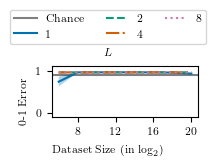

In [9]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 1

map_ls = {
    1: "-",
    2: "--",
    4: "-.",
    8: ":",
    16: (0, (3, 1, 1, 1, 1, 1)),
}

num_contexts_dataset_sizes = [64, 256, 1024, 4096, 16384, 65536, 262144, 1048576]


model_types = ["iw_predictor", "ic_predictor", "alpha"]

fig, ax = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax.axhline(chance_error, label="Chance", c="black", linestyle="-", alpha=0.5)

for num_contexts in num_contextss:
    losses_mean = num_contexts_data[("alpha", num_contexts)]["mean"]
    losses_std = num_contexts_data[("alpha", num_contexts)]["std"]
    ax.plot(dataset_scale(np.array(num_contexts_dataset_sizes)), losses_mean, label=num_contexts, linestyle=map_ls[num_contexts])
    ax.fill_between(dataset_scale(np.array(num_contexts_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
# ax.set_yticks([])

fig.suptitle("$L$", fontsize="8",)
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=3,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-simple_icl-num_contexts-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [14]:
num_low_freq_data = pickle.load(open("/Users/chanb/research/ualberta/icl/simple_icl/plot_utils/plots/data/simple_icl-num_low_freq-icl_only.pkl", "rb"))
num_low_freqs = np.unique([key[1] for key in num_low_freq_data.keys()])

In [17]:
num_low_freq_dataset_sizes = [1024, 4096, 16384, 65536, 262144, 1048576]

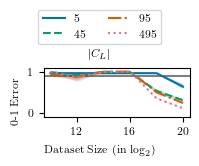

In [18]:
dataset_scale = np.log2
dataset_unit = "(in $\\log_{2}$)"
num_seeds = 5
chance_error = 9/10

num_rows = 1
num_cols = 1

map_ls = {
    5: "-",
    45: "--",
    95: "-.",
    495: ":",
}

model_types = ["iw_predictor", "ic_predictor", "alpha"]

fig, ax = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.3, (num_rows, num_cols), use_golden_ratio=True),
    layout="constrained",
)

ax.axhline(chance_error, c="black", linestyle="-", alpha=0.5)

for num_low_freq in num_low_freqs:
    losses_mean = num_low_freq_data[("alpha", num_low_freq)]["mean"]
    losses_std = num_low_freq_data[("alpha", num_low_freq)]["std"]
    ax.plot(dataset_scale(np.array(num_low_freq_dataset_sizes)), losses_mean, label=num_low_freq, linestyle=map_ls[num_low_freq])
    ax.fill_between(dataset_scale(np.array(num_low_freq_dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_ylim(-0.1, 1.1)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.suptitle("$\\vert C_L \\vert$", fontsize="8",)
fig.supylabel("0-1 Error", fontsize="8",)
fig.supxlabel("Dataset Size {}".format(dataset_unit), fontsize="8",)
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=2,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
plt.savefig("synthetic-simple_icl-num_low_freq-icl_analysis.pdf", dpi=600, format="pdf", bbox_inches="tight")